#Predicting house prices

#Fire up graphlab create

In [2]:
import graphlab

A newer version of GraphLab Create (v1.8.5) is available! Your current version is v1.8.4.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


Load some house sales data

In [1]:
sales =graphlab.SFrame('home_data.gl/')

NameError: name 'graphlab' is not defined

In [7]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


#Exploring the data for houseing sales

In [10]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot",x="sqft_living",y="price")

#Create a simple regression model of sqft_living to price

In [4]:
train_data,test_data= sales.random_split(.8,seed=0)

#Build the regression model

In [5]:
sqft_model=graphlab.linear_regression.create(train_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16587
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 1.050060     | 4367631.909526     | 3036000.

#Evaluting the simple model

In [14]:
print test_data['price'].mean()

543054.042563


In [15]:
print sqft_model.evaluate(test_data)

{'max_error': 4150479.3131276085, 'rmse': 255186.8770707015}


#Lets see what our prediction look like

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

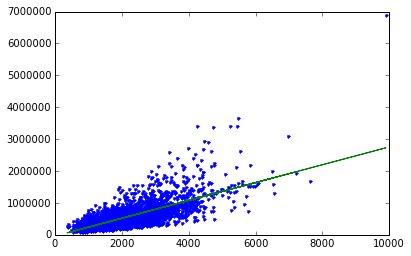

In [8]:
plt.plot(test_data["sqft_living"],test_data['price'],'.',test_data["sqft_living"],sqft_model.predict(test_data),'-',)

In [20]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-46230.7121661,5052.65783969
sqft_living,None,281.167987769,2.2214173218


#Explore other features in the data

In [24]:
my_features=['bedrooms','bathrooms','sqft_living','floors','zipcode']

In [25]:
sales[my_features].show()

In [26]:
sales.show(view='BoxWhisker Plot', x='zipcode',y='price')

#Build a regression model with more features

In [28]:
my_features_model=graphlab.linear_regression.create(train_data,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16481
PROGRESS: Number of features          : 5
PROGRESS: Number of unpacked features : 5
PROGRESS: Number of coefficients    : 114
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.022001     | 3737872.926734     | 134491

In [29]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'zipcode']


In [31]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4150479.3131276085, 'rmse': 255186.8770707015}
{'max_error': 3452679.7355582546, 'rmse': 179453.44430169082}


#Apply learn models to prdict prices of 3 houses

In [32]:
house1=sales[sales['id']=='5309101200']

In [33]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="peacocks-2d.jpg">

In [34]:
house1 = sales[sales['id']=='5309101200']

In [35]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

In [37]:
print house1['price']

[620000L, ... ]


In [39]:
print sqft_model.predict(house1)

[628572.4584802845]


In [40]:
print my_features_model.predict(house1)

[726423.1493348402]


#prdiction for a second ,fancier house

In [45]:
house2=sales[sales['id']=='1925069082']

In [46]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

In [47]:
print sqft_model.predict(house2)

[1258388.7510835314]


In [48]:
print my_features_model.predict(house2)

[1452333.7964448046]


In [49]:
##Last house

In [50]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [51]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13951143.507944115]
